# Statistical Modeling with Python

`statsmodels` is better suited for traditional stats

In [2]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## A minimal OLS example

Four pairs of points

In [3]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

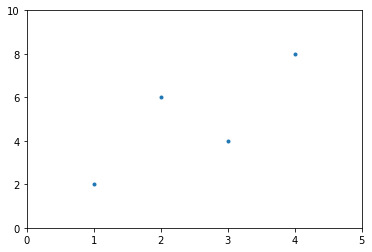

In [4]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)#poner la limitación del eje x y del eje y.xlim
plt.ylim(0,10)
plt.show()

In [5]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

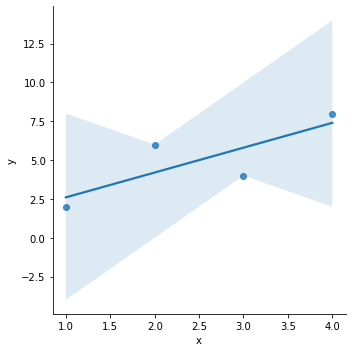

In [6]:
sns.lmplot(x = 'x', y = 'y', data = d)
#Es la regresión lineal


## Formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [7]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)#Aqui tnemos el data frame
#el metodo que tilizamos para calcular el modelo
#Los minimos cuadrados ordinarios
#Lo aplicamos, a la recta de regresión que ya tenemos definidos
#Con lo que calculamos beta 0 y beta 1


In [8]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()
#Con fit alimentamos el modelo
#todo lo que hace el modelo
#para hacer las transformaciones.



In [9]:
#a los resultados que hayan salido
#La tabla que nos da a continuación
#Nos da bastante información estadistica
#La variable dependiente
print(results.summary()) 



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.200
Time:                        02:03:55   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [10]:
#intercepto estamos obteniendo
#y=1+1.6x
#Resumen de toda la información estadistica

Using the abline_plot function for plotting the results

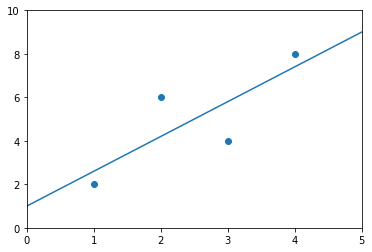

In [11]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)
#se ajusta el modelo
plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

In [12]:
print(sm.stats.anova_lm(results))


           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


Making predictions

In [13]:
results.predict({'x' : 2})

0    4.2
dtype: float64

## numpy array notation
similar to sklearn's notation
otro metodo


In [14]:
print(x)

[1 2 3 4]


In [15]:
X = sm.add_constant(x)  
# need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [16]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$


In [17]:
# OLS is capitalized in the numpy notation
#Este es otro metodo
model2 = sm.OLS(y, X)  


In [18]:
results2 = model2.fit()


In [19]:
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.200
Time:                        02:03:56   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


## OLS solution
-Omitir formula
$$(X^TX)^{-1}X^TY$$

In [20]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [21]:
np.linalg.inv(X.T @ X) @ (X.T @ y)#@ es multiplicar matrices
#el primer valor es el intercepto
#el segundo valor es la pendiente

array([1. , 1.6])

## Plot Interaction of Categorical Factors- Ahora con mas variables es lo mismo

https://www.statsmodels.org/dev/examples/notebooks/generated/categorical_interaction_plot.html

In this example, we will visualize the interaction between categorical factors. First, we will create some categorical data. Then, we will plot it using the interaction_plot function, which internally re-codes the x-factor categories to integers.

In [22]:
# https://stackoverflow.com/questions/55663474/interaction-plot-from-statsmodels-formula-api-using-python

import pandas as pd
from statsmodels.formula.api import ols
#listas del mismo tamaño, hacemos un diccionario
Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female",
           "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100]
#imprimimos el data frame
df = pd.DataFrame( {"Consumption": Consumption, "Gender": Gender, "Income": Income})
print(df)

    Consumption  Gender  Income
0            51    Male      80
1            52    Male      80
2            53    Male      90
3            54    Male      90
4            56    Male     100
5            57    Male     100
6            55  Female      80
7            56  Female      80
8            58  Female      90
9            59  Female      90
10           62  Female     100
11           63  Female     100


In [23]:
#vamos a sacar una tabla como la de arriba
#OLS
Reg = ols(formula = "Consumption ~ Gender + Income + Gender*Income", data = df) #hacemos la regresion de consuption con respecto al genero~ son nuestras variables responsivas
Fit = Reg.fit()                                                                 #La regresion es varias variables, gender, income y gender*income
#cuanto gana un hombre o mujer por unidad
Fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           8.11e-07
Time:                        02:03:56   Log-Likelihood:                -9.9135
No. Observations:                  12   AIC:                             27.83
Df Residuals:                       8   BIC:                             29.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                27.3333      3.059      8.935      0.000      20.279      34.387
Gender[T.Male]            4.0000      4.326      0.925      0.382      -5.976      13.976
Income                    0.3500      0.034     10.340      0.000       0.272       0.428
Gender[T.Male]:Income    -0.1000      0.048     -2.089      0.070      -0.210       0.010
==============================================================================
Omnibus:                        2.522   Durbin-Watson:                   3.273
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                0.970
Skew:                          -0.055   Prob(JB):                        0.616
Kurtosis:                       1.612   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

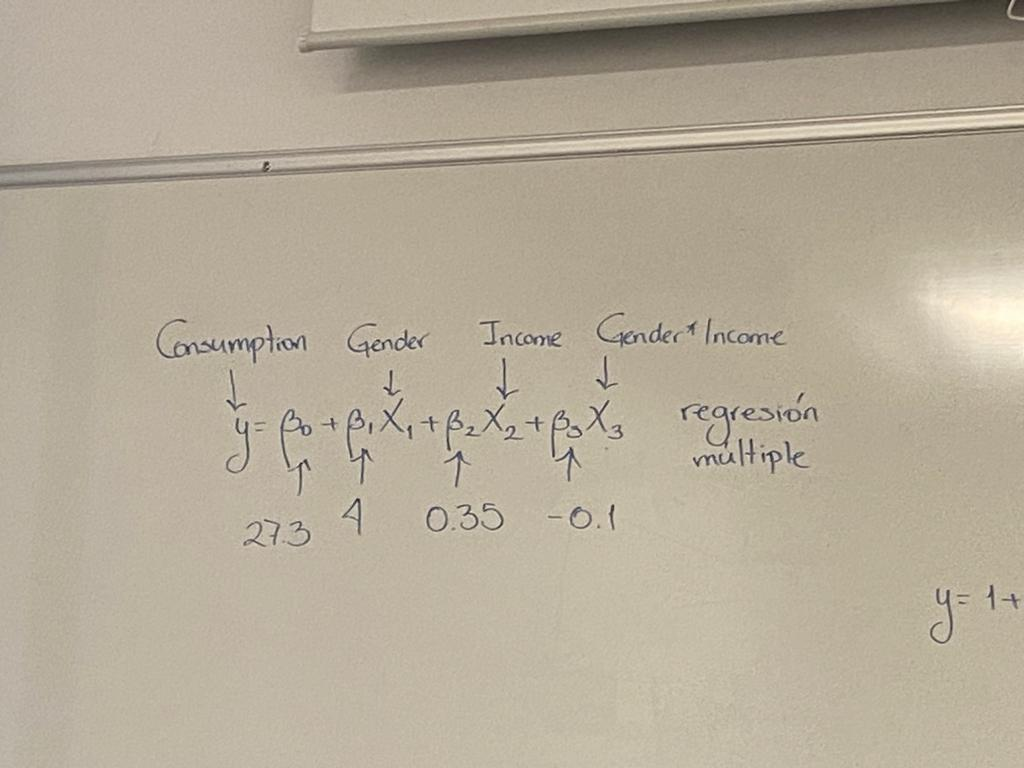

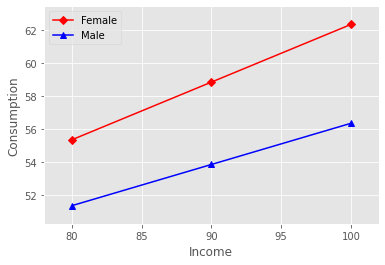

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
plt.style.use('ggplot')

fig = interaction_plot(
   x        = Income,
   trace    = Gender,
   response = Fit.fittedvalues,
   colors   = ['red','blue'],
   markers  = ['D','^'])
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.legend().set_title(None)
plt.show()

##Ejercicio
- aumentar 5 datos mas en x,y
- Quitar gender*income
- Mostrar las tablas en summary
- Documentar


In [25]:
#Aumentamos 5 datos mas
x = np.array([1,2,3,4,6,8,9,5,10])
y = np.array([2,6,4,8,1,2,3,4,5])

In [26]:
#Usamos la variable responsiva(y) y los datos(x)
model = smf.ols('y ~ x', data = d)
results = model.fit()


In [27]:
#Mostramos la tabla del resumen estadistico de nuestros datos
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.200
Time:                        02:03:57   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [28]:
#vemos una nueva regresión quitando gender*income
Reg = ols(formula = "Consumption ~ Gender + Income", data = df) #hacemos la regresion de consuption con respecto al genero~ son nuestras variables responsivas
Fit = Reg.fit()                                                                 #La regresion es varias variables, gender, income.
#cuanto gana un hombre o mujer por unidad
Fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.66e-07
Time:                        02:03:57   Log-Likelihood:                -12.525
No. Observations:                  12   AIC:                             31.05
Df Residuals:                       9   BIC:                             32.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.8333      2.546     12.505      0.000      26.075      37.592
Gender[T.Male]    -5.0000      0.458    -10.914      0.000      -6.036      -3.964
Income             0.3000      0.028     10.694      0.000       0.237       0.363
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.503
Skew:                           0.228   Prob(JB):                        0.778
Kurtosis:                       2.107   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""